In [2]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
import warnings 
warnings.filterwarnings("ignore")

In [3]:
pd.set_option('display.max_columns', None) # in ordert to be able to see all the columns

In [4]:
df_fifa=pd.read_csv('fifa21_male2.csv',low_memory=False)
df_fifa.head(5)

,ID,Name,Age,OVA,Nationality,Club,BOV,BP,Position,Player Photo,Club Logo,Flag Photo,POT,Team & Contract,Height,Weight,foot,Growth,Joined,Loan Date End,Value,Wage,Release Clause,Contract,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,Gender
0,2,G. Pasquale,33,69,Italy,Udinese,71,LWB,LM,https://cdn.sofifa.com/players/000/002/16_120.png,https://cdn.sofifa.com/teams/55/light_60.png,https://cdn.sofifa.com/flags/it.png,69,Udinese 2008 ~ 2016,"6'0""",181lbs,Left,0,"Jul 1, 2008",NaN,€625K,€7K,€0,2008 ~ 2016,313,75,50,59,71,58.0,338,73,65.0,60,69,71,347,68,74,68.0,69,68.0,347,74,68.0,69,68,68,320,72,69.0,63.0,66.0,50,NaN,208,70,69,69.0,56,14,5,15,10,12,1929,408,3 ★,2★,Medium,High,2 ★,71,59,70,71,68,69,4,65+0,65+0,65+0,68+0,67+0,67+0,67+0,68+0,68+0,68+0,68+0,69+0,69+0,69+0,69+0,69+0,71+-2,70+-1,70+-1,70+-1,71+-2,70+-1,69+0,69+0,69+0,70+-1,17+0,Male
1,16,Luis García,37,71,Spain,KAS Eupen,70,CM,CM CAM CDM,https://cdn.sofifa.com/players/000/016/19_120.png,https://cdn.sofifa.com/teams/2013/light_60.png,https://cdn.sofifa.com/flags/es.png,71,KAS Eupen 2014 ~ 2019,"5'10""",143lbs,Right,0,"Jul 19, 2014",NaN,€600K,€7K,€1.1M,2014 ~ 2019,337,68,64,61,76,68.0,369,69,79.0,79,71,71,305,56,50,62.0,65,72.0,324,75,54.0,64,60,71,362,71,71.0,72.0,73.0,75,79.0,153,70,43,40.0,56,9,12,13,11,11,1906,385,4 ★,3★,Medium,Medium,1 ★,53,69,73,69,58,63,4,67+1,67+1,67+1,67+0,68+0,68+0,68+0,67+0,70+1,70+1,70+1,68+1,70+1,70+1,70+1,68+1,62+1,66+1,66+1,66+1,62+1,60+1,60+1,60+1,60+1,60+1,17+1,Male
2,27,J. Cole,33,71,England,Coventry City,71,CAM,CAM RM RW LM,https://cdn.sofifa.com/players/000/027/16_120.png,https://cdn.sofifa.com/teams/1800/light_60.png,https://cdn.sofifa.com/flags/gb-eng.png,71,Coventry City 2016 ~ 2020,"5'9""",161lbs,Right,0,"Jan 7, 2016",NaN,€1.1M,€15K,€0,2016 ~ 2020,337,80,64,41,77,75.0,387,79,84.0,77,69,78,295,48,42,71.0,59,75.0,284,72,58.0,29,56,69,317,69,39.0,69.0,74.0,66,NaN,99,35,34,30.0,51,9,6,13,16,7,1770,354,4 ★,4★,Medium,Low,2 ★,45,68,76,77,36,52,11,64+0,64+0,64+0,70+0,69+0,69+0,69+0,70+0,71+0,71+0,71+0,68+0,66+0,66+0,66+0,68+0,52+0,54+0,54+0,54+0,52+0,47+0,46+0,46+0,46+0,47+0,15+0,Male
3,36,D. Yorke,36,68,Trinidad &amp; Tobago,Sunderland,70,ST,NaN,https://cdn.sofifa.com/players/000/036/09_120.png,https://cdn.sofifa.com/teams/106/light_60.png,https://cdn.sofifa.com/flags/tt.png,82,Sunderland 2009,"5'11""",165lbs,Right,14,NaN,NaN,€0,€0,€0,2009,264,54,70,60,80,NaN,255,68,NaN,46,64,77,176,59,62,NaN,55,NaN,239,63,NaN,51,66,59,271,59,70.0,72.0,NaN,70,NaN,75,34,41,NaN,68,5,21,64,21,21,1348,369,3 ★,1★,NaN,NaN,1 ★,61,66,66,69,47,60,3,67+0,67+0,67+0,66+0,67+0,67+0,67+0,66+0,70+0,70+0,70+0,66+0,68+0,68+0,68+0,66+0,56+0,65+0,65+0,65+0,56+0,57+0,51+0,51+0,51+0,57+0,22+0,Male
4,41,Iniesta,36,81,Spain,Vissel Kobe,82,CAM,CM CAM,https://cdn.sofifa.com/players/000/041/20_120.png,https://cdn.sofifa.com/teams/101146/light_60.png,https://cdn.sofifa.com/flags/es.png,81,Vissel Kobe 2018 ~ 2021,"5'7""",150lbs,Right,0,"Jul 16, 2018",NaN,€5.5M,€12K,€7.2M,2018 ~ 2021,367,75,69,54,90,79.0,408,85,80.0,70,83,90,346,61,56,79.0,75,75.0,297,67,40.0,58,62,70,370,58,70.0,78.0,93.0,71,89.0,181,68,57,56.0,45,6,13,6,13,7,2014,420,4 ★,4★,High,Medium,4 ★,58,70,85,85,63,59,149,72+3,72+3,72+3,79+0,79+0,79+0,79+0,79+0,82+-1,82+-1,82+-1,79+2,81+0,81+0,81+0,79+2,70+3,73+3,73+3,73+3,70+3,67+3,64+3,64+3,64+3,67+3,17+3,Male


In [5]:
df_fifa.shape # We are going to check the dimensions of the dataset

(17125, 107)

# We are going to try to predict the market value of the player

## Cleaning the dataset

### *In order to make this analysis we are going to choose the columns we think can give us more information and use them to get the information*

In [6]:
# We are going to choose the columns in order to create the final dataframe to work with.

columns_mv=['ID','Name','Age','OVA','Nationality','Club','BOV','BP','Height','Weight','Value','Wage','Release Clause','foot','Attacking','Defending','Mentality','Total Stats','Base Stats']
df_fifa_mv=df_fifa[columns_mv]
df_fifa_mv.head()

,ID,Name,Age,OVA,Nationality,Club,BOV,BP,Height,Weight,Value,Wage,Release Clause,foot,Attacking,Defending,Mentality,Total Stats,Base Stats
0,2,G. Pasquale,33,69,Italy,Udinese,71,LWB,"6'0""",181lbs,€625K,€7K,€0,Left,313,208,320,1929,408
1,16,Luis García,37,71,Spain,KAS Eupen,70,CM,"5'10""",143lbs,€600K,€7K,€1.1M,Right,337,153,362,1906,385
2,27,J. Cole,33,71,England,Coventry City,71,CAM,"5'9""",161lbs,€1.1M,€15K,€0,Right,337,99,317,1770,354
3,36,D. Yorke,36,68,Trinidad &amp; Tobago,Sunderland,70,ST,"5'11""",165lbs,€0,€0,€0,Right,264,75,271,1348,369
4,41,Iniesta,36,81,Spain,Vissel Kobe,82,CAM,"5'7""",150lbs,€5.5M,€12K,€7.2M,Right,367,181,370,2014,420


In [7]:
df_fifa_mv.columns= [x.lower() for x in df_fifa_mv.columns] # We want to convert all the column names in lowercase
df_fifa_mv.head()

,id,name,age,ova,nationality,club,bov,bp,height,weight,value,wage,release clause,foot,attacking,defending,mentality,total stats,base stats
0,2,G. Pasquale,33,69,Italy,Udinese,71,LWB,"6'0""",181lbs,€625K,€7K,€0,Left,313,208,320,1929,408
1,16,Luis García,37,71,Spain,KAS Eupen,70,CM,"5'10""",143lbs,€600K,€7K,€1.1M,Right,337,153,362,1906,385
2,27,J. Cole,33,71,England,Coventry City,71,CAM,"5'9""",161lbs,€1.1M,€15K,€0,Right,337,99,317,1770,354
3,36,D. Yorke,36,68,Trinidad &amp; Tobago,Sunderland,70,ST,"5'11""",165lbs,€0,€0,€0,Right,264,75,271,1348,369
4,41,Iniesta,36,81,Spain,Vissel Kobe,82,CAM,"5'7""",150lbs,€5.5M,€12K,€7.2M,Right,367,181,370,2014,420


In [18]:
df_fifa_mv.rename(columns={'bp':'best position','height':'height(ft)','weight':'weight(lbs)','value':'value(M€)','wage':'wage(K€)','release_clause':'release_clause_million'},inplace=True) # bp column will be renamed as 'best position'
df_fifa_mv.head(1)

,id,name,age,ova,nationality,club,bov,best_position,height(ft),weight(lbs),value(M€),wage(K€),release_clause_million,foot,attacking,defending,mentality,total_stats,base_stats
0,2,G. Pasquale,33,69,Italy,Udinese,71,LWB,"6'0""",181lbs,€625K,€7K,€0,Left,313,208,320,1929,408


In [19]:
df_fifa_mv.columns= [x.replace(' ','_') for x in df_fifa_mv.columns] # here we will replace blanks for the underscore 
                                                                     #in the column names
df_fifa_mv.head()

,id,name,age,ova,nationality,club,bov,best_position,height(ft),weight(lbs),value(M€),wage(K€),release_clause_million,foot,attacking,defending,mentality,total_stats,base_stats
0,2,G. Pasquale,33,69,Italy,Udinese,71,LWB,"6'0""",181lbs,€625K,€7K,€0,Left,313,208,320,1929,408
1,16,Luis García,37,71,Spain,KAS Eupen,70,CM,"5'10""",143lbs,€600K,€7K,€1.1M,Right,337,153,362,1906,385
2,27,J. Cole,33,71,England,Coventry City,71,CAM,"5'9""",161lbs,€1.1M,€15K,€0,Right,337,99,317,1770,354
3,36,D. Yorke,36,68,Trinidad &amp; Tobago,Sunderland,70,ST,"5'11""",165lbs,€0,€0,€0,Right,264,75,271,1348,369
4,41,Iniesta,36,81,Spain,Vissel Kobe,82,CAM,"5'7""",150lbs,€5.5M,€12K,€7.2M,Right,367,181,370,2014,420


In [20]:
df_fifa_mv.shape # the shape of our new dataframe

(17102, 19)

In [21]:
# We want to check the columns with missing values.
df_fifa_mv.isnull().sum() 
# As we can see, the only column with missing values is the one with the information of the club.

id                        0
name                      0
age                       0
ova                       0
nationality               0
club                      0
bov                       0
best_position             0
height(ft)                0
weight(lbs)               0
value(M€)                 0
wage(K€)                  0
release_clause_million    0
foot                      0
attacking                 0
defending                 0
mentality                 0
total_stats               0
base_stats                0
dtype: int64

In [22]:
# The following thing we are going to do is to delete the players with no Club information 
# so we have all the columns withouth missing values
df_fifa_mv=df_fifa_mv.dropna()

In [23]:
df_fifa_mv.isnull().sum() # We confirm that the rows with missing values in 'Club' column were dropped

id                        0
name                      0
age                       0
ova                       0
nationality               0
club                      0
bov                       0
best_position             0
height(ft)                0
weight(lbs)               0
value(M€)                 0
wage(K€)                  0
release_clause_million    0
foot                      0
attacking                 0
defending                 0
mentality                 0
total_stats               0
base_stats                0
dtype: int64

In [24]:
# We are going to look for duplicated rows as well

duplicated=df_fifa_mv.duplicated().sum()
duplicated # as we can see there is no duplicated row in our dataframe

0

In [25]:
unique_values= df_fifa_mv.nunique(axis = 0)
print(unique_values) # Here we can see the unique values for each column

id                        17102
name                      16154
age                          30
ova                          50
nationality                 167
club                        917
bov                          50
best_position                15
height(ft)                   21
weight(lbs)                  56
value(M€)                   216
wage(K€)                    142
release_clause_million     1200
foot                          2
attacking                   366
defending                   249
mentality                   351
total_stats                1400
base_stats                  249
dtype: int64


In [26]:
df_fifa_mv['name'].duplicated().sum() # We check for duplicated values in the 'name' column. There are 787 duplicated names.

948

In [27]:
df_fifa_mv[df_fifa_mv['name'].duplicated()]

,id,name,age,ova,nationality,club,bov,best_position,height(ft),weight(lbs),value(M€),wage(K€),release_clause_million,foot,attacking,defending,mentality,total_stats,base_stats
411,136130,Alex,33,79,Brazil,Milan,78,CB,"6'2""",203lbs,€4.5M,€80K,€0,Right,244,242,296,1757,368
612,149825,D. Murphy,36,67,Republic of Ireland,Bolton Wanderers,67,ST,"6'3""",194lbs,€275K,€2K,€481K,Left,328,70,323,1652,333
797,159202,G. Rodríguez,34,68,Mexico,Puebla FC,68,LB,"5'11""",172lbs,€325K,€4K,€553K,Left,273,205,318,1814,376
907,164079,Juninho,35,72,Brazil,Tigres U.A.N.L.,71,CB,"5'11""",176lbs,€725K,€20K,€1.2M,Right,329,210,324,1849,363
908,164082,Adriano,35,74,Brazil,KAS Eupen,74,LB,"5'8""",165lbs,€1.6M,€8K,€2.4M,Left,317,225,350,2045,424
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17083,258972,I. Touré,17,57,France,Le Havre AC,59,CB,"6'3""",165lbs,€210K,€500,€578K,Right,190,169,194,1300,287
17084,258973,M. Fofana,19,56,France,Le Havre AC,60,RM,"5'10""",154lbs,€130K,€900,€254K,Right,239,134,250,1542,330
17103,259053,C. Castro,19,61,Colombia,Boavista FC,63,CB,"6'4""",185lbs,€425K,€850,€1.2M,Right,202,183,226,1351,290
17112,259074,A. Hajdari,17,53,Switzerland,FC Basel 1893,55,CB,"6'2""",176lbs,€120K,€500,€300K,Left,161,157,195,1207,259


In [28]:
df_fifa_mv.drop_duplicates(subset='name',inplace=True)

In [29]:
for i in df_fifa_mv['name']:
    df_fifa_mv['name'].dropna(inplace=True) # with this loop we have droped all the NaN values

In [30]:
df_fifa_mv['name'].duplicated().sum() # There are no more duplicates in the 'name' column.

0

In [31]:
df_fifa_mv.dtypes # To check the type of data of every variable

id                         int64
name                      object
age                        int64
ova                        int64
nationality               object
club                      object
bov                        int64
best_position             object
height(ft)                object
weight(lbs)               object
value(M€)                 object
wage(K€)                  object
release_clause_million    object
foot                      object
attacking                  int64
defending                  int64
mentality                  int64
total_stats                int64
base_stats                 int64
dtype: object

##### *As we can see above, the columns 'height', 'weight', 'value', 'wage' and 'release_clause' are **objects** but we need them to be **floats** so we can treat them as numbers. Therefore, we are going to clean them.*

In [32]:
df_fifa_mv['height(ft)'] = df_fifa_mv['height(ft)'].str.replace('"', '')
df_fifa_mv['height(ft)'] = df_fifa_mv['height(ft)'].str.replace("'", '.')
df_fifa_mv['height(ft)'] = df_fifa_mv['height(ft)'].astype(float)
df_fifa_mv.head()

,id,name,age,ova,nationality,club,bov,best_position,height(ft),weight(lbs),value(M€),wage(K€),release_clause_million,foot,attacking,defending,mentality,total_stats,base_stats
0,2,G. Pasquale,33,69,Italy,Udinese,71,LWB,6.00,181lbs,€625K,€7K,€0,Left,313,208,320,1929,408
1,16,Luis García,37,71,Spain,KAS Eupen,70,CM,5.10,143lbs,€600K,€7K,€1.1M,Right,337,153,362,1906,385
2,27,J. Cole,33,71,England,Coventry City,71,CAM,5.90,161lbs,€1.1M,€15K,€0,Right,337,99,317,1770,354
3,36,D. Yorke,36,68,Trinidad &amp; Tobago,Sunderland,70,ST,5.11,165lbs,€0,€0,€0,Right,264,75,271,1348,369
4,41,Iniesta,36,81,Spain,Vissel Kobe,82,CAM,5.70,150lbs,€5.5M,€12K,€7.2M,Right,367,181,370,2014,420


In [33]:
df_fifa_mv['weight(lbs)'] = df_fifa_mv['weight(lbs)'].str.replace('lbs', '') # to delete 'lbs' from the column
df_fifa_mv['weight(lbs)'] = df_fifa_mv['weight(lbs)'].str.replace("'", '.')
df_fifa_mv['weight(lbs)'] = df_fifa_mv['weight(lbs)'].astype(float)
df_fifa_mv.head(100)

,id,name,age,ova,nationality,club,bov,best_position,height(ft),weight(lbs),value(M€),wage(K€),release_clause_million,foot,attacking,defending,mentality,total_stats,base_stats
0,2,G. Pasquale,33,69,Italy,Udinese,71,LWB,6.00,181.0,€625K,€7K,€0,Left,313,208,320,1929,408
1,16,Luis García,37,71,Spain,KAS Eupen,70,CM,5.10,143.0,€600K,€7K,€1.1M,Right,337,153,362,1906,385
2,27,J. Cole,33,71,England,Coventry City,71,CAM,5.90,161.0,€1.1M,€15K,€0,Right,337,99,317,1770,354
3,36,D. Yorke,36,68,Trinidad &amp; Tobago,Sunderland,70,ST,5.11,165.0,€0,€0,€0,Right,264,75,271,1348,369
4,41,Iniesta,36,81,Spain,Vissel Kobe,82,CAM,5.70,150.0,€5.5M,€12K,€7.2M,Right,367,181,370,2014,420
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,8963,Manuel Pablo,39,67,Spain,Deportivo de La Coruña,71,CDM,5.90,176.0,€0,€6K,€0,Right,297,220,309,1742,361
99,9014,A. Robben,36,80,Netherlands,FC Groningen,81,CAM,5.11,176.0,€5M,€12K,€7.3M,Left,367,78,319,1970,407
100,9432,Y. Benayoun,33,76,Israel,Queens Park Rangers,78,CAM,5.10,154.0,€1.9M,€35K,€0,Right,367,125,326,1912,396
101,9676,S. Eto'o,36,81,Cameroon,Atiker Konyaspor,79,ST,5.10,165.0,€6.5M,€20K,€13M,Right,384,94,357,2019,415


In [34]:
df_fifa_mv['wage(K€)'] = df_fifa_mv['wage(K€)'].str.replace('K', '') # to delete 'K' from the column
df_fifa_mv['wage(K€)'] = df_fifa_mv['wage(K€)'].str.replace('€', '')
df_fifa_mv['wage(K€)'] = df_fifa_mv['wage(K€)'].astype(float)
df_fifa_mv.head(5)

,id,name,age,ova,nationality,club,bov,best_position,height(ft),weight(lbs),value(M€),wage(K€),release_clause_million,foot,attacking,defending,mentality,total_stats,base_stats
0,2,G. Pasquale,33,69,Italy,Udinese,71,LWB,6.00,181.0,€625K,7.0,€0,Left,313,208,320,1929,408
1,16,Luis García,37,71,Spain,KAS Eupen,70,CM,5.10,143.0,€600K,7.0,€1.1M,Right,337,153,362,1906,385
2,27,J. Cole,33,71,England,Coventry City,71,CAM,5.90,161.0,€1.1M,15.0,€0,Right,337,99,317,1770,354
3,36,D. Yorke,36,68,Trinidad &amp; Tobago,Sunderland,70,ST,5.11,165.0,€0,0.0,€0,Right,264,75,271,1348,369
4,41,Iniesta,36,81,Spain,Vissel Kobe,82,CAM,5.70,150.0,€5.5M,12.0,€7.2M,Right,367,181,370,2014,420


In [35]:
def release_cl(release_clause):

    release_clause=release_clause.replace('€', '')
    
    if ('M' in release_clause):
        return float(release_clause.replace('M', ''))                
        
        
    elif ('K' in release_clause):
        return float(release_clause.replace('K', ''))/1000
        

    else:
        return float(release_clause)


In [36]:
df_fifa_mv['release_clause_million']=df_fifa_mv['release_clause_million'].apply(release_cl)

In [37]:
df_fifa_mv.head()

,id,name,age,ova,nationality,club,bov,best_position,height(ft),weight(lbs),value(M€),wage(K€),release_clause_million,foot,attacking,defending,mentality,total_stats,base_stats
0,2,G. Pasquale,33,69,Italy,Udinese,71,LWB,6.00,181.0,€625K,7.0,0.0,Left,313,208,320,1929,408
1,16,Luis García,37,71,Spain,KAS Eupen,70,CM,5.10,143.0,€600K,7.0,1.1,Right,337,153,362,1906,385
2,27,J. Cole,33,71,England,Coventry City,71,CAM,5.90,161.0,€1.1M,15.0,0.0,Right,337,99,317,1770,354
3,36,D. Yorke,36,68,Trinidad &amp; Tobago,Sunderland,70,ST,5.11,165.0,€0,0.0,0.0,Right,264,75,271,1348,369
4,41,Iniesta,36,81,Spain,Vissel Kobe,82,CAM,5.70,150.0,€5.5M,12.0,7.2,Right,367,181,370,2014,420


In [38]:
def val(value):

    value=value.replace('€', '')
    
    if ('M' in value):
        return float(value.replace('M', ''))                   
        
        
    elif ('K' in value):
        return float(value.replace('K', ''))/1000 
        

    else:
        return float(value)

In [39]:
df_fifa_mv['value(M€)']=df_fifa_mv['value(M€)'].apply(val)

In [40]:
df_fifa_mv.head()

,id,name,age,ova,nationality,club,bov,best_position,height(ft),weight(lbs),value(M€),wage(K€),release_clause_million,foot,attacking,defending,mentality,total_stats,base_stats
0,2,G. Pasquale,33,69,Italy,Udinese,71,LWB,6.00,181.0,0.625,7.0,0.0,Left,313,208,320,1929,408
1,16,Luis García,37,71,Spain,KAS Eupen,70,CM,5.10,143.0,0.600,7.0,1.1,Right,337,153,362,1906,385
2,27,J. Cole,33,71,England,Coventry City,71,CAM,5.90,161.0,1.100,15.0,0.0,Right,337,99,317,1770,354
3,36,D. Yorke,36,68,Trinidad &amp; Tobago,Sunderland,70,ST,5.11,165.0,0.000,0.0,0.0,Right,264,75,271,1348,369
4,41,Iniesta,36,81,Spain,Vissel Kobe,82,CAM,5.70,150.0,5.500,12.0,7.2,Right,367,181,370,2014,420


#### We are going to delete all the rows with 0 value in the columns "wage(K€)", "release_clause_million" and "value(M€)" as those would not be real values.

In [41]:
df_fifa_mv=df_fifa_mv[df_fifa_mv['wage(K€)']!=0]
df_fifa_mv=df_fifa_mv[df_fifa_mv['release_clause_million']!=0]
df_fifa_mv=df_fifa_mv[df_fifa_mv['value(M€)']!=0]
df_fifa_mv.shape

(14471, 19)

In [42]:
df_fifa_mv.describe() # through this function we want to identify if there are any outliers and we also want to get an overview
                      # of the values of our data.

,id,age,ova,bov,height(ft),weight(lbs),value(M€),wage(K€),release_clause_million,attacking,defending,mentality,total_stats,base_stats
count,14471.000000,14471.000000,14471.000000,14471.000000,14471.000000,14471.000000,14471.000000,14471.000000,14471.000000,14471.000000,14471.000000,14471.000000,14471.000000,14471.000000
mean,221400.785157,25.231981,66.949209,67.892406,5.800659,165.777486,2.720613,110.613503,5.130372,257.758759,142.085136,261.508534,1631.086863,361.517863
std,31534.353058,4.856178,6.898092,6.680007,0.451681,15.797443,5.625453,226.418192,10.857246,72.935487,61.581486,63.466193,262.991515,40.508788
min,16.000000,16.000000,47.000000,46.000000,5.100000,110.000000,0.003000,1.000000,0.005000,42.000000,20.000000,50.000000,731.000000,228.000000
25%,204461.500000,21.000000,62.000000,64.000000,5.110000,154.000000,0.400000,3.000000,0.707000,231.000000,85.000000,234.000000,1490.500000,333.000000
50%,229050.000000,25.000000,67.000000,68.000000,5.900000,165.000000,0.825000,7.000000,1.500000,271.000000,160.000000,269.000000,1660.000000,363.000000
75%,243918.500000,29.000000,72.000000,72.000000,6.100000,176.000000,2.600000,32.000000,4.800000,306.000000,194.000000,304.000000,1814.000000,390.000000
max,259105.000000,47.000000,93.000000,93.000000,6.900000,243.000000,105.500000,950.000000,203.100000,437.000000,272.000000,421.000000,2316.000000,497.000000


##### As we can see in the table the minumum and the maximum values are coherent and we can say the there are no or 'unreal' values.

# The goal now will be to understand how the value of a player is influenced by the other variables and try to predict. In addition, we want to see the relationship between some variables and the trend of other.

In [43]:
df_fifa_mv.head()

,id,name,age,ova,nationality,club,bov,best_position,height(ft),weight(lbs),value(M€),wage(K€),release_clause_million,foot,attacking,defending,mentality,total_stats,base_stats
1,16,Luis García,37,71,Spain,KAS Eupen,70,CM,5.1,143.0,0.600,7.0,1.100,Right,337,153,362,1906,385
4,41,Iniesta,36,81,Spain,Vissel Kobe,82,CAM,5.7,150.0,5.500,12.0,7.200,Right,367,181,370,2014,420
6,80,E. Belözoğlu,38,77,Turkey,Fenerbahçe SK,77,CM,5.7,159.0,2.800,44.0,5.300,Left,342,190,384,2017,403
26,1179,G. Buffon,42,82,Italy,Juventus,82,GK,6.4,203.0,2.200,41.0,3.600,Right,95,35,150,1292,429
41,2147,M. Stekelenburg,37,72,Netherlands,Ajax,72,GK,6.6,203.0,0.325,5.0,0.455,Right,93,38,142,1150,388


## Who are the most valuable players?

In [44]:
df_fifa_valuable= df_fifa_mv.nlargest(10,'value(M€)') # to get the most valueable players
df_fifa_valuable

,id,name,age,ova,nationality,club,bov,best_position,height(ft),weight(lbs),value(M€),wage(K€),release_clause_million,foot,attacking,defending,mentality,total_stats,base_stats
9331,231747,K. Mbappé,21,90,France,Paris Saint-Germain,91,ST,5.10,161.0,105.5,160.0,203.1,Right,408,100,341,2147,466
2650,190871,Neymar Jr,28,91,Brazil,Paris Saint-Germain,91,LW,5.90,150.0,90.0,270.0,166.5,Right,408,94,356,2175,451
2871,192985,K. De Bruyne,29,91,Belgium,Manchester City,91,CAM,5.11,154.0,87.0,370.0,161.0,Right,407,186,408,2304,485
2287,188545,R. Lewandowski,31,91,Poland,FC Bayern München,91,ST,6.00,176.0,80.0,240.0,132.0,Right,423,96,391,2195,457
5030,208722,S. Mané,28,90,Senegal,Liverpool,90,LW,5.90,152.0,78.0,250.0,144.3,Right,410,122,358,2203,469
5109,209331,M. Salah,28,90,Egypt,Liverpool,90,RW,5.90,157.0,78.0,250.0,144.3,Left,392,122,376,2211,470
4166,203376,V. van Dijk,28,90,Netherlands,Liverpool,90,CB,6.40,203.0,75.5,210.0,145.3,Right,316,272,347,2112,455
3665,200389,J. Oblak,27,91,Slovenia,Atlético Madrid,91,GK,6.20,192.0,75.0,125.0,159.4,Right,95,57,140,1413,489
4049,202652,R. Sterling,25,88,England,Manchester City,88,LW,5.70,152.0,72.5,270.0,139.6,Right,360,147,332,2111,455
3961,202126,H. Kane,26,88,England,Tottenham Hotspur,88,ST,6.20,196.0,71.0,220.0,140.2,Right,420,130,382,2172,449


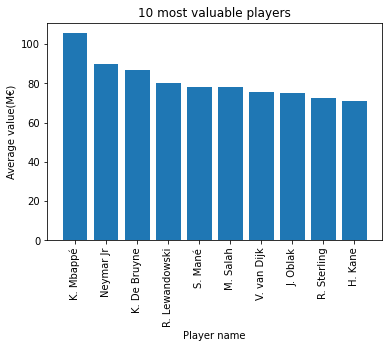

In [45]:
#sb.set_theme(style="whitegrid")
#df_fifa_most_valuable1 = sb.load_dataset('df_fifa_valuable')
plt.bar(x=df_fifa_valuable['name'],height=df_fifa_valuable['value(M€)'],data=df_fifa_valuable)
plt.xlabel('Player name')
plt.ylabel('Average value(M€)')
plt.xticks(rotation=90)
plt.title('10 most valuable players');

## Which position groups the most valuable players on average?

In [46]:
df_fifa_mean_bp=df_fifa_mv.groupby('best_position')['value(M€)'].mean() # we have grouped the players by their 
# best position so we can see the average value of the players by position.
df_fifa_mean_bp

best_position
CAM    3.308841
CB     2.291519
CDM    3.018991
CF     6.908284
CM     3.946325
GK     2.286786
LB     2.403465
LM     2.736172
LW     4.641105
LWB    2.567537
RB     2.469190
RM     2.182728
RW     3.704062
RWB    2.542317
ST     2.536329
Name: value(M€), dtype: float64

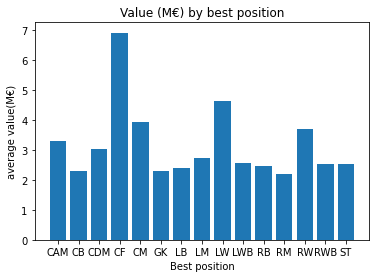

In [47]:
plt.bar(x=df_fifa_mean_bp.index,height=df_fifa_mean_bp.values,data=df_fifa_mean_bp)
plt.xlabel('Best position')
plt.ylabel('average value(M€)');
plt.title('Value (M€) by best position'); # The most values position is CF with almos 7 million euro on average.

## What is the distribution of the players by age? And the corresponding market value?

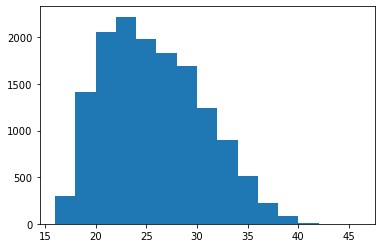

In [48]:
x=df_fifa_mv['age']
plt.hist(x, bins = range(16,47,2))
plt.show() # As we the histogram below shows, the career of the proffesional players would start at the age of 18 and if would
# be over at the age of 33 for the most of the players in this database.

In [49]:
df_fifa_mean_age=df_fifa_mv.groupby('age')['value(M€)'].mean() # we have grouped the players by their 
# best position so we can see the average value of the players by position.


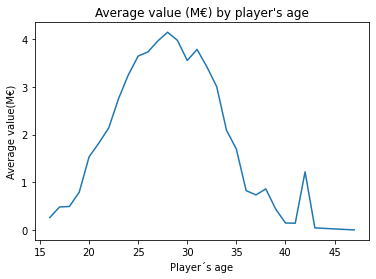

In [50]:
plt.plot(df_fifa_mean_age.index, df_fifa_mean_age.values)
plt.xlabel('Player´s age')
plt.ylabel('Average value(M€)')
plt.title("Average value (M€) by player's age");
plt.show() # In the plot below it is possible to see that the peak of the value of the player takes place at the age of 28. 
# After that the value starts to drop.

## Are the left-footers the same market value as the right-footers?

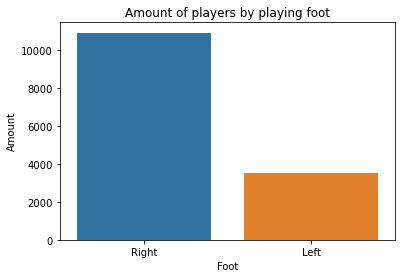

In [51]:
foot=sb.countplot(x="foot", data=df_fifa_mv);
foot.set(xlabel = "Foot", ylabel = "Amount",title='Amount of players by playing foot');

In [52]:
df_fifa_mean_foot=df_fifa_mv.groupby('foot')['value(M€)'].mean() # we have grouped the players by their 
# best position so we can see the average value of the players by position.
df_fifa_mean_foot

foot
Left     2.808149
Right    2.692275
Name: value(M€), dtype: float64

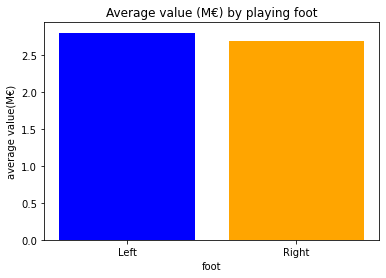

In [53]:
colour=['blue','orange']
plt.bar(x=df_fifa_mean_foot.index,height=df_fifa_mean_foot.values,data=df_fifa_mean_foot, color=colour)
plt.xlabel('foot')
plt.ylabel('average value(M€)')
plt.title('Average value (M€) by playing foot'); # surprisingly the left foot players are about %6 higher value than the right foot ones.

## Which are the 10 nationalities with the highest market values?

In [54]:
df_fifa_nat= df_fifa_mv.groupby('nationality')['value(M€)'].mean().nlargest(10) # to get the most valueable players by country
df_fifa_nat.nlargest(10)

nationality
Egypt         11.022500
Syria          5.950000
Algeria        5.794082
Brazil         5.559533
Slovenia       5.219605
Portugal       5.206684
Gabon          5.072500
Morocco        4.762317
Mozambique     4.500000
Ukraine        4.322803
Name: value(M€), dtype: float64

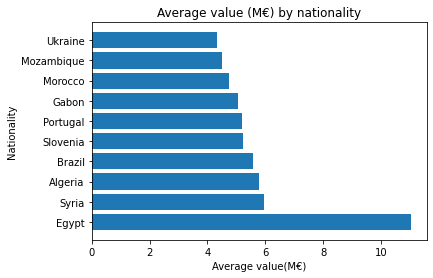

In [55]:
plt.barh(y=df_fifa_nat.index,width=df_fifa_nat.values,data=df_fifa_nat)
plt.xlabel('Average value(M€)')
plt.ylabel('Nationality');
plt.title('Average value (M€) by nationality'); 

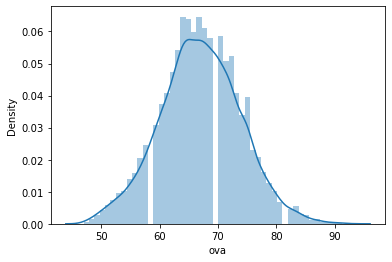

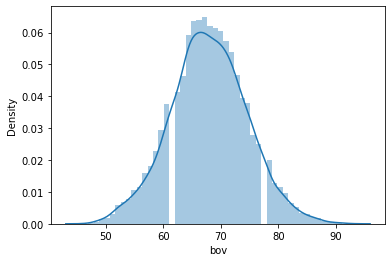

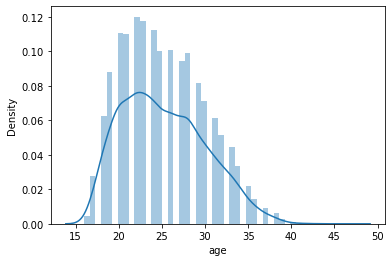

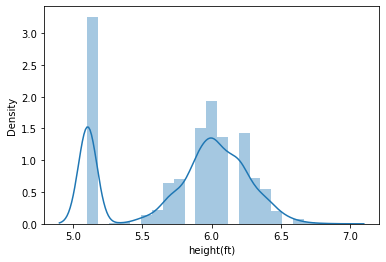

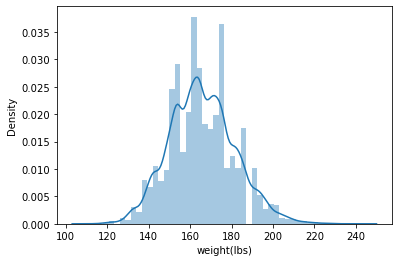

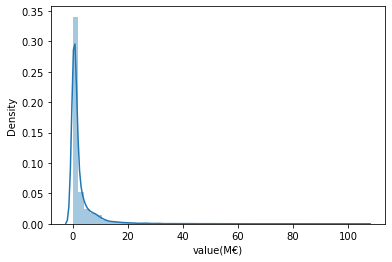

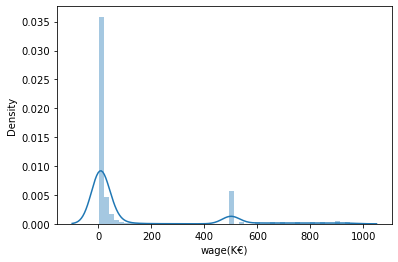

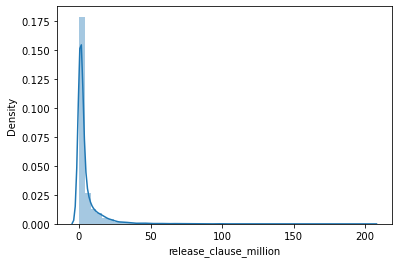

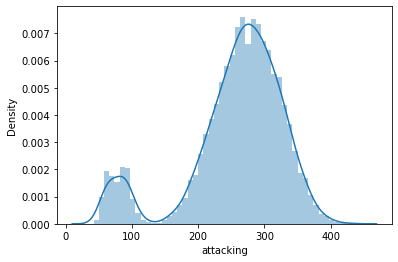

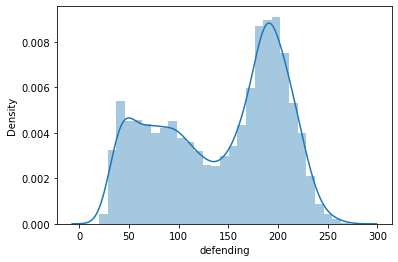

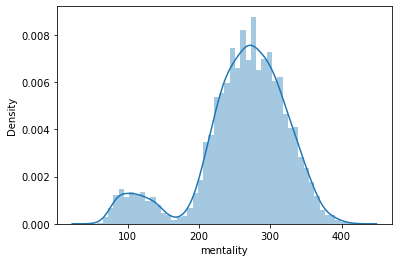

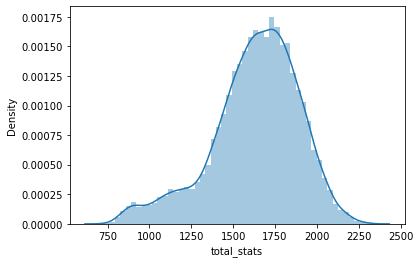

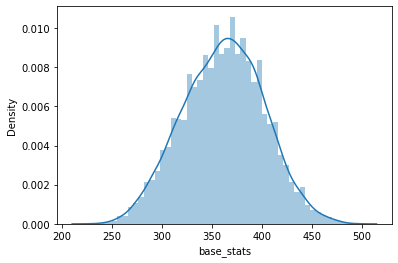

In [56]:
plot_col=['ova','bov','age','height(ft)','weight(lbs)','value(M€)','wage(K€)','release_clause_million','attacking','defending','mentality','total_stats','base_stats']

for col in df_fifa_mv[plot_col]:
    sb.distplot(df_fifa_mv[col])
    plt.show()

#### As shown in the plots above, some of our variables have a normal distribution (ova,bov,weight,total_stats and base_stats).

In [57]:
df_fifa_num=df_fifa_mv[plot_col]

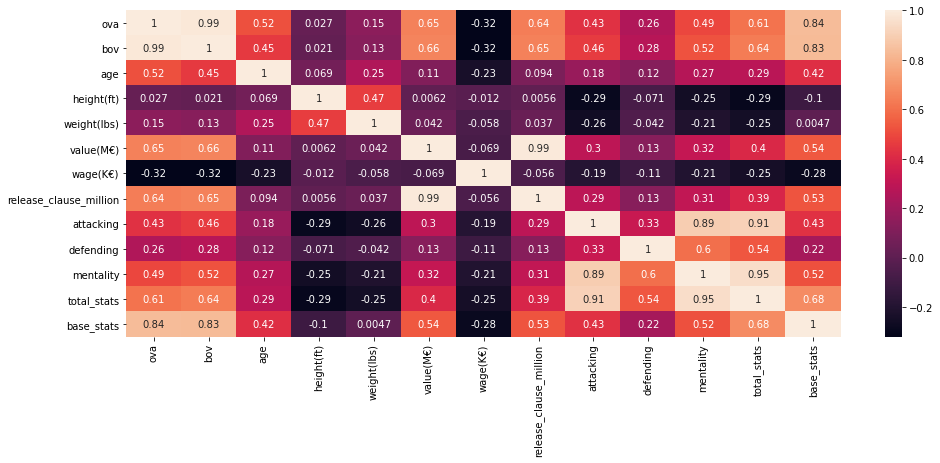

In [58]:
plt.figure(figsize=(16, 6))
sb.heatmap(df_fifa_num.corr(),annot=True);

#### Through the heatmap above we are able to see the Pearson correlation coefficients paired by variables. As we want to analyze the value of the players, we will check the correlation value of this variable with the rest. For example, the correlation value of the player value with *ova* and *bov* is higher than 0.6, which indicates that they are highly correlated. In addition, the *base_stats* variable is also highly correlated to *value* but the higher correlation value corresponds to the *release_clause_million* variable, that is 0.99. We are going to make one model with this variable and another one without it.

In [59]:
df_fifa_mv_a=df_fifa_mv.drop(['id','release_clause_million','name','nationality','club'],axis=1)

In [60]:
df_fifa_mv_b=df_fifa_mv.drop(['id','name','nationality','club'],axis=1)

In [74]:
df_fifa_mv_c=df_fifa_mv.drop(['id','name','club','release_clause_million'],axis=1)

## Next step will be to encode categorical variables

In [75]:
df_fifa_mv_b.dtypes

age                         int64
ova                         int64
bov                         int64
best_position              object
height(ft)                float64
weight(lbs)               float64
value(M€)                 float64
wage(K€)                  float64
release_clause_million    float64
foot                       object
attacking                   int64
defending                   int64
mentality                   int64
total_stats                 int64
base_stats                  int64
dtype: object

In [76]:
y_a = df_fifa_mv_a['value(M€)']
X_a = df_fifa_mv_a.drop(['value(M€)'], axis=1)

y_b = df_fifa_mv_b['value(M€)']
X_b = df_fifa_mv_b.drop(['value(M€)'], axis=1)

y_c = df_fifa_mv_c['value(M€)']
X_c = df_fifa_mv_c.drop(['value(M€)'], axis=1)

In [77]:
X_num_a = X_a.select_dtypes(include = np.number)
X_cat_a = X_a.select_dtypes(include = 'object')

X_num_b = X_b.select_dtypes(include = np.number)
X_cat_b = X_b.select_dtypes(include = 'object')

X_num_c = X_c.select_dtypes(include = np.number)
X_cat_c = X_c.select_dtypes(include = 'object')

In [78]:
normalizer_a = StandardScaler() 
normalizer_a.fit(X_num_a)
X_stand_a = normalizer_a.transform(X_num_a)


normalizer_b = StandardScaler() 
normalizer_b.fit(X_num_b)
X_stand_b = normalizer_b.transform(X_num_b)

normalizer_c = StandardScaler() 
normalizer_c.fit(X_num_c)
X_stand_c = normalizer_c.transform(X_num_c)

In [79]:
encoder_a = OneHotEncoder(handle_unknown='error', drop='first')
encoder_a.fit(X_cat_a)

encoder_b = OneHotEncoder(handle_unknown='error', drop='first')
encoder_b.fit(X_cat_b)

encoder_c = OneHotEncoder(handle_unknown='error', drop='first')
encoder_c.fit(X_cat_c)

OneHotEncoder(drop='first')

In [80]:
encoded_a = encoder_a.transform(X_cat_a).toarray()
encoded_a

encoded_b = encoder_b.transform(X_cat_b).toarray()
encoded_b

encoded_c = encoder_c.transform(X_cat_c).toarray()
encoded_c

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 1.]])

In [81]:
X_a = np.concatenate([X_stand_a, encoded_a], axis=1)

X_b = np.concatenate([X_stand_b, encoded_b], axis=1)

X_c = np.concatenate([X_stand_c, encoded_c], axis=1)

In [82]:
X_train_a, X_test_a, y_train_a, y_test_a = train_test_split(X_a, y_a, test_size=0.3, random_state=42) # We will use the 70% of 
# the data to train our model

X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_b, y_b, test_size=0.3, random_state=42) 

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_c, y_c, test_size=0.3, random_state=42) 

In [83]:
model_a = LinearRegression() 
model_a.fit(X_train_a,y_train_a) # We will get the ecuation from here

model_b = LinearRegression() 
model_b.fit(X_train_b,y_train_b)

model_c = LinearRegression() 
model_c.fit(X_train_c,y_train_c)

LinearRegression()

In [84]:
predictions_a  = model_a.predict(X_test_a) # and now we are going to make the predictions with the 30% of the data used 
# for testing the model

predictions_b  = model_b.predict(X_test_b)

predictions_c  = model_c.predict(X_test_c)

In [85]:
r2_a=r2_score(y_test_a, predictions_a)
rmse_a=mean_squared_error(y_test_a, predictions_a, squared=False)
mse_a=mean_squared_error(y_test_a, predictions_a)
mae_a=mean_absolute_error(y_test_a, predictions_a)

r2_b=r2_score(y_test_b, predictions_b)
rmse_b=mean_squared_error(y_test_b, predictions_b, squared=False)
mse_b=mean_squared_error(y_test_b, predictions_b)
mae_b=mean_absolute_error(y_test_b, predictions_b)

r2_c=r2_score(y_test_c, predictions_c)
rmse_c=mean_squared_error(y_test_c, predictions_c, squared=False)
mse_c=mean_squared_error(y_test_c, predictions_c)
mae_c=mean_absolute_error(y_test_c, predictions_c)

print('The r2_a value is {}'.format(r2_a))
print('The Mean Square Error  error value from "a" model is {}'.format(mse_a))
print('The Root Mean Square Error value from "a" model is {}'.format(rmse_a))
print('The Mean Absolute Error value from "a" model is {}'.format(mae_a))

print('The r2_b value is {}'.format(r2_b))
print('The Mean Square Error  error value from "b" model is {}'.format(mse_b))
print('The Root Mean Square Error value from "b" model is {}'.format(rmse_b))
print('The Mean Absolute Error value from "b" model is {}'.format(mae_b))


print('The r2_c value is {}'.format(r2_c))
print('The Mean Square Error  error value from "c" model is {}'.format(mse_c))
print('The Root Mean Square Error value from "c" model is {}'.format(rmse_c))
print('The Mean Absolute Error value from "c" model is {}'.format(mae_c))


The r2_a value is 0.5294067338167071
The Mean Square Error  error value from "a" model is 14.227133587328373
The Root Mean Square Error value from "a" model is 3.771887271291173
The Mean Absolute Error value from "a" model is 2.1252081481532143
The r2_b value is 0.9876608419158417
The Mean Square Error  error value from "b" model is 0.37304156908634534
The Root Mean Square Error value from "b" model is 0.6107712903258841
The Mean Absolute Error value from "b" model is 0.29313466419060663
The r2_c value is 0.5336977081736931
The Mean Square Error  error value from "c" model is 14.097407410216304
The Root Mean Square Error value from "c" model is 3.754651436580539
The Mean Absolute Error value from "c" model is 2.1488168966142926
